In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from statsmodels.tsa.stattools import grangercausalitytests


In [6]:
trump=pd.read_csv(r'D:\Final Project Econ\trump sentiment and tweets.csv')#,usecols=['created_at', 'user_screen_name', 'is_quote','user_followers_count', 'user_friends_count', 'compound'])
biden=pd.read_csv(r'D:\Final Project Econ\biden sentiment and tweets.csv')#,usecols=['created_at', 'user_screen_name', 'is_quote','user_followers_count', 'user_friends_count', 'compound'])
date_list=pd.date_range(start='2020-09-01', end='2020-11-03')
trump['created_at']=pd.to_datetime(trump['created_at'])
trump.set_index('created_at',inplace=True)
trump=trump.loc[:'2020-11-03']

temp_list=[]
n_value=[]
compound_list=trump['compound'].to_list()
followers_list=trump['user_followers_count'].to_list()
following_list=trump['user_friends_count'].to_list()
i=0
while i<len(followers_list):
    temp=(followers_list[i])-(following_list[i])
    if temp>=10:
        a=np.log10(temp)
    else:
        a=1
    b=float(compound_list[i])
    temp_list.append((a*b))
    n_value.append(a)

    i=i+1
    
trump['follower_multiplier']=n_value
trump['follower_multiplier_2']=[i-1 for i in n_value]
trump.head()

i=0
sentiment_value_1_list=[]
sentiment_value_2_list=[]
while i<len(n_value):
    sentiment_value_1_list.append(compound_list[i] * n_value[i])
    sentiment_value_2_list.append(compound_list[i] * ((n_value[i])-1))
    
    
    i=i+1

trump['sentiment_value_1']=sentiment_value_1_list
trump['sentiment_value_2']=sentiment_value_2_list


#making stuff into list
trump_daily_sentiment_value_normal=[]
trump_daily_sentiment_value_adj1=[]
trump_daily_sentiment_value_adj2=[]

for i in date_list:
    trump_daily_sentiment_value_adj1.append(trump.loc[i]['sentiment_value_1'].mean())
    trump_daily_sentiment_value_adj2.append(trump.loc[i]['sentiment_value_2'].mean())
    trump_daily_sentiment_value_normal.append(trump.loc[i]['compound'].mean())

biden['created_at']=pd.to_datetime(biden['created_at'])
biden.set_index('created_at',inplace=True)
biden=biden.loc[:'2020-11-03']

temp_list=[]
n_value=[]
compound_list=biden['compound'].to_list()
followers_list=biden['user_followers_count'].to_list()
following_list=biden['user_friends_count'].to_list()
i=0
while i<len(followers_list):
    temp=(followers_list[i])-(following_list[i])
    if temp>=10:
        a=np.log10(temp)
    else:
        a=1
    b=float(compound_list[i])
    temp_list.append((a*b))
    n_value.append(a)

    i=i+1
    
biden['follower_multiplier']=n_value
biden['follower_multiplier_2']=[i-1 for i in n_value]
biden.head()

i=0
sentiment_value_1_list=[]
sentiment_value_2_list=[]
while i<len(n_value):
    sentiment_value_1_list.append(compound_list[i] * n_value[i])
    sentiment_value_2_list.append(compound_list[i] * ((n_value[i])-1))
    
    
    i=i+1

biden['sentiment_value_1']=sentiment_value_1_list
biden['sentiment_value_2']=sentiment_value_2_list


#making stuff into list
biden_daily_sentiment_value_normal=[]
biden_daily_sentiment_value_adj1=[]
biden_daily_sentiment_value_adj2=[]

for i in date_list:
    biden_daily_sentiment_value_adj1.append(biden.loc[i]['sentiment_value_1'].mean())
    biden_daily_sentiment_value_adj2.append(biden.loc[i]['sentiment_value_2'].mean())
    biden_daily_sentiment_value_normal.append(biden.loc[i]['compound'].mean())



In [11]:
# prepping stuff for graphs 
JBPoll = mpatches.Patch(color='blue', label='Joe Biden Polls')
DTPoll = mpatches.Patch(color='red', label='Donald Trump Polls')
DTWPoll = mpatches.Patch(color='green', label='Trump Weighted Polling average')
JBWPoll = mpatches.Patch(color='magenta', label='Biden Weighted Polling average')
DiffPoll=mpatches.Patch(color='black', label='% difference between Biden & Trump')
yticks=[-.15,-.1,-.05,0,.05,.1]
grid_alpha=.5

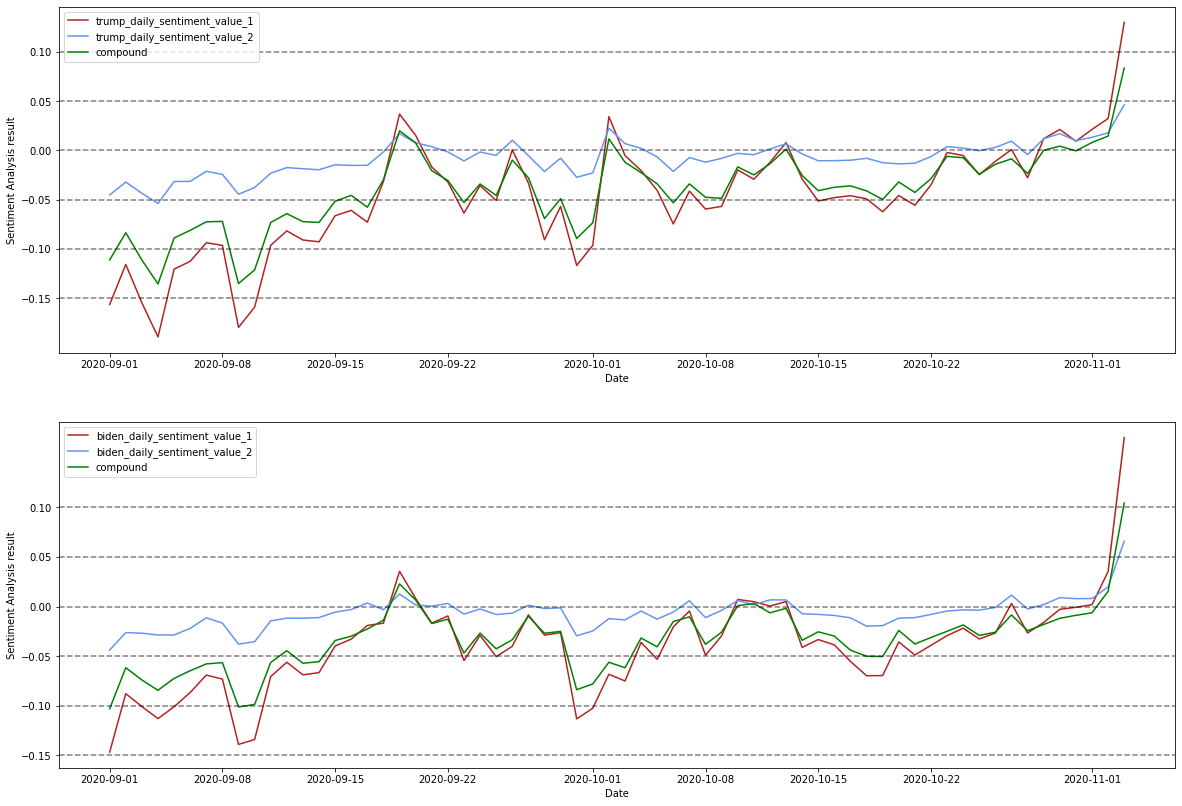

In [15]:
fig,ax=plt.subplots(2,1,figsize=(20,14))

ax[0].plot(date_list,trump_daily_sentiment_value_adj1,label='trump_daily_sentiment_value_1',c="firebrick")
ax[0].plot(date_list,trump_daily_sentiment_value_adj2,label='trump_daily_sentiment_value_2',c="cornflowerblue")
ax[0].plot(date_list,trump_daily_sentiment_value_normal,label='compound',c='green')



ax[0].set_yticks(yticks)

ax[0].set_xlabel("Date")
ax[0].set_ylabel("Sentiment Analysis result")
ax[0].axhline(-.15, color='black',ls='--',alpha=grid_alpha)
ax[0].axhline(-.10, color='black',ls='--',alpha=grid_alpha)
ax[0].axhline(-.05, color='black',ls='--',alpha=grid_alpha)
ax[0].axhline(0, color='black',ls='--',alpha=grid_alpha)
ax[0].axhline(.05, color='black',ls='--',alpha=grid_alpha)
ax[0].axhline(.10, color='black',ls='--',alpha=grid_alpha)
ax[0].legend()
####

ax[1].plot(date_list,biden_daily_sentiment_value_adj1,label='biden_daily_sentiment_value_1',c="firebrick")
ax[1].plot(date_list,biden_daily_sentiment_value_adj2,label='biden_daily_sentiment_value_2',c="cornflowerblue")
ax[1].plot(date_list,biden_daily_sentiment_value_normal,label='compound',c='green')

ax[1].set_yticks(yticks)

ax[1].set_xlabel("Date")
ax[1].set_ylabel("Sentiment Analysis result")
ax[1].axhline(-.15, color='black',ls='--',alpha=grid_alpha)
ax[1].axhline(-.10, color='black',ls='--',alpha=grid_alpha)
ax[1].axhline(-.05, color='black',ls='--',alpha=grid_alpha)
ax[1].axhline(0, color='black',ls='--',alpha=grid_alpha)
ax[1].axhline(.05, color='black',ls='--',alpha=grid_alpha)
ax[1].axhline(.10, color='black',ls='--',alpha=grid_alpha)

ax[1].legend()
plt.show()

In [ ]:
T_polls=pd.read_csv(r'D:/Final Project Econ/trump polling data.csv')
T_polls['end_date']=pd.to_datetime(T_polls['end_date'])
T_polls.set_index('answer',inplace=True)

B_polls=pd.read_csv(r'D:/Final Project Econ/biden polling data.csv')
B_polls['end_date']=pd.to_datetime(B_polls['end_date'])
B_polls.set_index('answer',inplace=True)

T_polls['pct'].astype(float)
#T_polls['FTE2'].astype(float)
trump_pct=T_polls['pct'].array
trump_poll=T_polls['end_date'].array
#trump_alpha=T_polls['FTE2'].to_list()

# making a list of polling pcts & polling dates
B_polls['pct'].astype(float)
#B_polls['FTE2'].astype(float)
biden_pct=B_polls['pct'].array
biden_poll=B_polls['end_date'].array
#biden_alpha=B_polls['FTE2'].to_list()